***Walmart: Confidence Interval and CLT Business Case***

**Problem Statement**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and
the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and
female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
df = pd.read_csv("walmart_data.csv")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From the above cell we can see that Occupation , Marital Staus and  Product Category are integers.
Since these mentioned columns are categorical lets convert them to objects  

In [ ]:
columns = ["Occupation","Marital_Status","Product_Category"]
df[columns]=df[columns].astype("object")

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#> The dataset doesnt have any null/missing values
#> For Purchase Amount : the mean and median values has a difference of 1220 approximately inidicating that there may be some outliers

In [ ]:
#Lets do some Non - Graphical Analysis

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_columns].melt().groupby(['variable','value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

Some Observations

* 60% Single, 40% Married
* 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
* 75% of the users are Male and 24.6% are Female
* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
* Total of 20 product categories are there
* There are 20 different types of occupations in the city


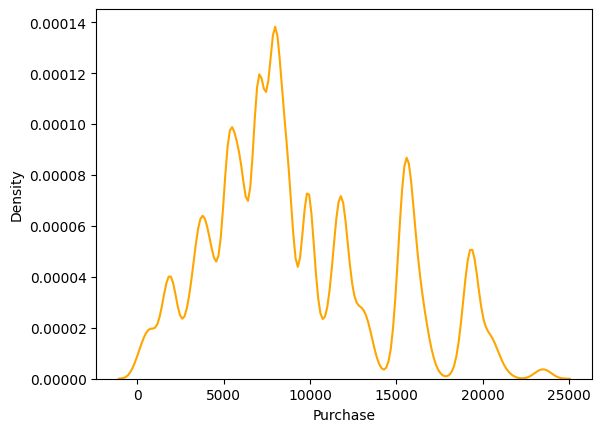

In [ ]:
sns.kdeplot(data=df, x='Purchase',color="Orange")
plt.show()

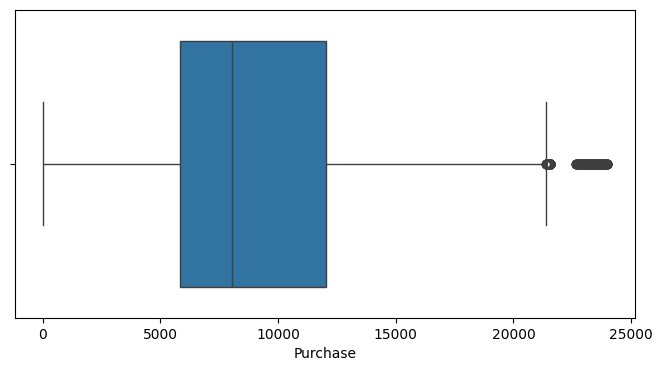

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="Purchase")
plt.show()

We can see from the above graph that purchase has outliers

For Categorical columns lets use pie charts and countplot to understand the distribution of data

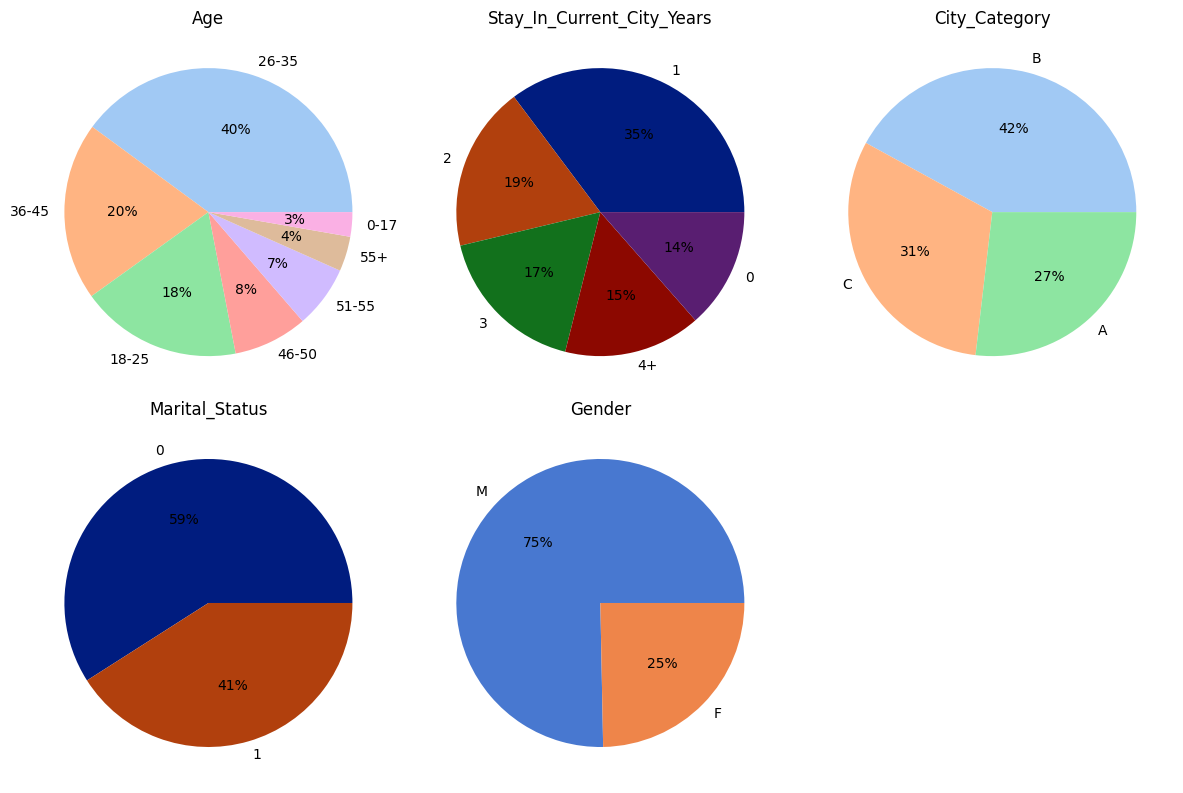

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

c1=sns.color_palette('pastel')
c2=sns.color_palette('dark')
c3=sns.color_palette('muted')

data = df['Age'].value_counts(normalize=True)*100
axis[0,0].pie(x=data.values, labels=data.index, autopct='%.0f%%',colors=c1)
axis[0,0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
axis[0,1].pie(x=data.values, labels=data.index, autopct='%.0f%%',colors=c2)
axis[0,1].set_title("Stay_In_Current_City_Years")

data = df['City_Category'].value_counts(normalize=True)*100
axis[0,2].pie(x=data.values, labels=data.index, autopct='%.0f%%',colors=c1)
axis[0,2].set_title("City_Category")

data = df['Marital_Status'].value_counts(normalize=True)*100
axis[1,0].pie(x=data.values, labels=data.index, autopct='%.0f%%',colors=c2)
axis[1,0].set_title("Marital_Status")

data = df['Gender'].value_counts(normalize=True)*100
axis[1,1].pie(x=data.values, labels=data.index, autopct='%.0f%%',colors=c3)
axis[1,1].set_title("Gender")


axis[1, 2].axis('off')

plt.tight_layout()

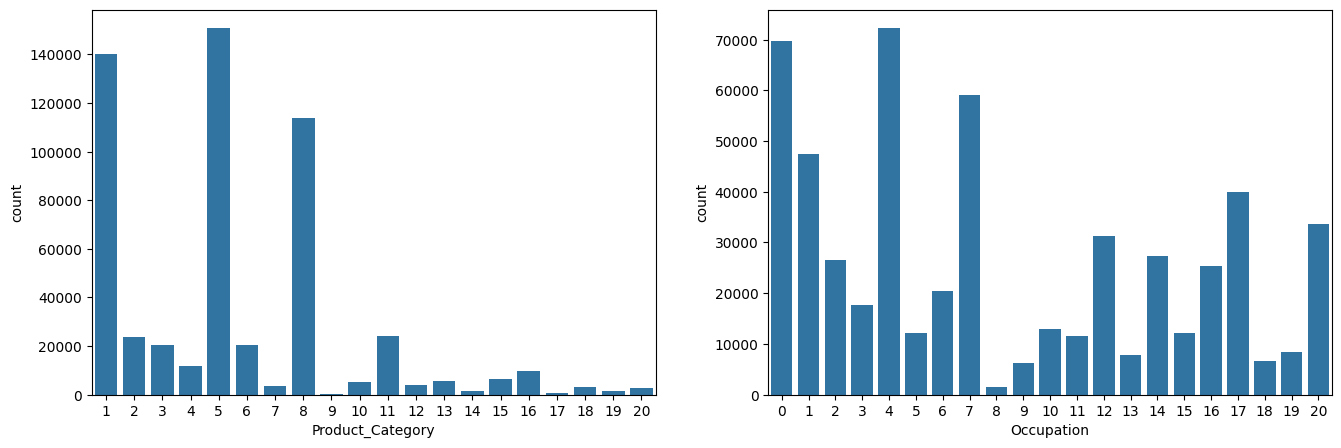

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.countplot(data=df, x='Product_Category', ax=axs[0])
sns.countplot(data=df, x='Occupation', ax=axs[1])
plt.show()

Observations :
* Majority of the people are in the age of 26-35
* Most of the users are single
* Most of the users are Male
* There are 20 different types of occupation and product category
* City B has majority no of users

<ipython-input-16-0be016ae8583>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=categories[0], palette='Set2')


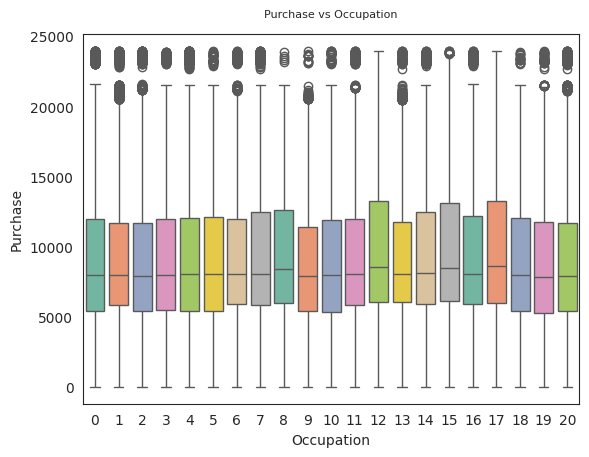

<ipython-input-16-0be016ae8583>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=categories[1], palette='Set2')


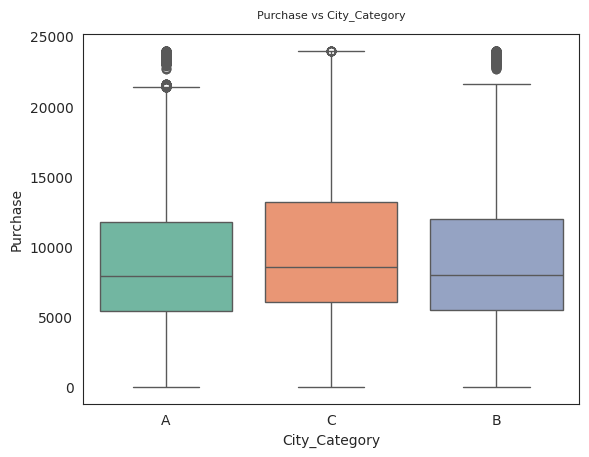

<ipython-input-16-0be016ae8583>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=categories[2], palette='Set2')


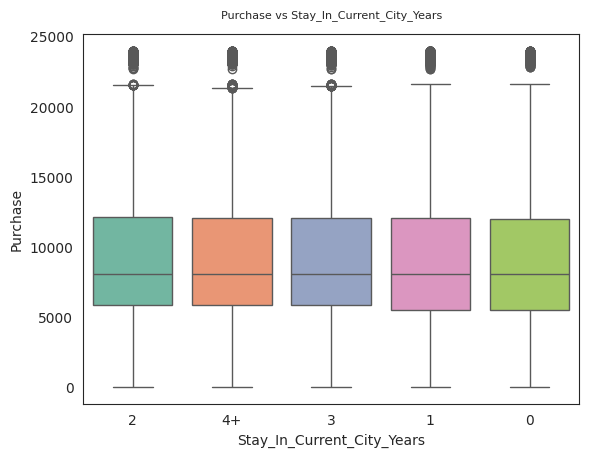

<ipython-input-16-0be016ae8583>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=categories[-1], palette='Set3')


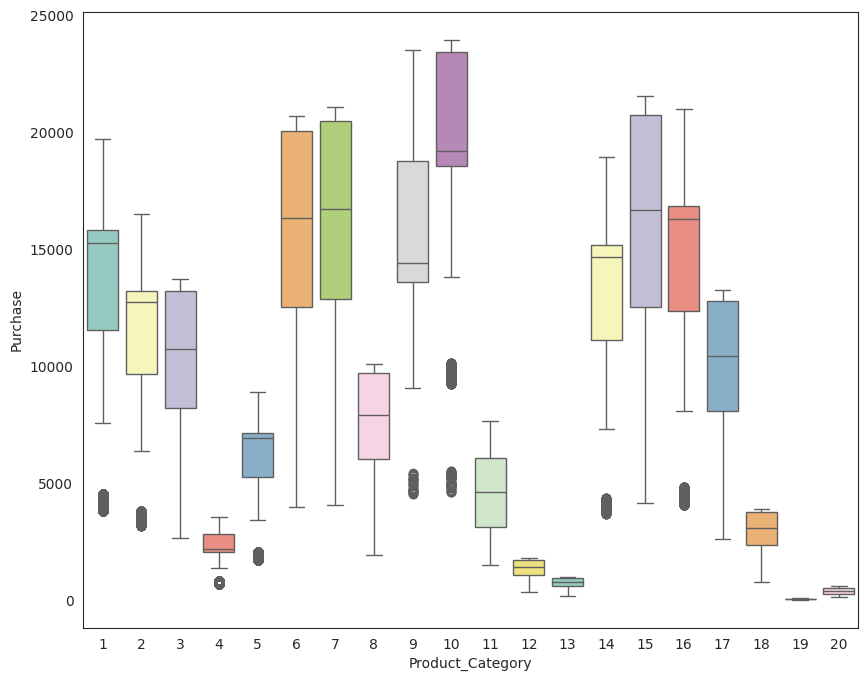

In [ ]:
categories = ['Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category']
sns.set_style("white")

sns.boxplot(data=df, y='Purchase', x=categories[0], palette='Set2')
plt.title(f"Purchase vs {categories[0]}", pad=12,fontsize=8)
plt.show()

sns.boxplot(data=df, y='Purchase', x=categories[1], palette='Set2')
plt.title(f"Purchase vs {categories[1]}", pad=12,fontsize=8)
plt.show()

sns.boxplot(data=df, y='Purchase', x=categories[2], palette='Set2')
plt.title(f"Purchase vs {categories[2]}", pad=12,fontsize=8)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=categories[-1], palette='Set3')
plt.show()

Missing Values / Outlier Detection

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no Missing values in the dataset

In [ ]:
def find_outliers_IQR(df):
 q1=df.quantile(0.25)
 q3=df.quantile(0.75)
 IQR=q3-q1
 outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
 return outliers


In [ ]:
outliers = find_outliers_IQR(df["Purchase"])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum outlier value:"+ str(outliers.max()))
print("Minimum outlier value: "+ str(outliers.min()))


Number of Outliers: 2677
Maximum outlier value:23961
Minimum outlier value: 21401


Lets try to address some questions using CLT and Confidence Level Topics

1.**Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
amount_spent = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
amount_spent = amount_spent.reset_index()
amount_spent.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


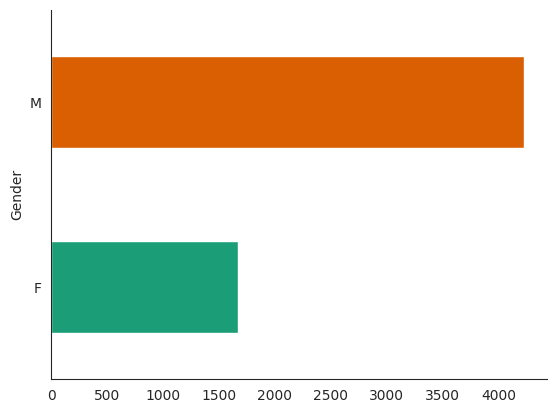

In [ ]:
# @title Gender wise count

from matplotlib import pyplot as plt
import seaborn as sns
amount_spent.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above graph we can see that Male purchases are about 4225 and that of Female are 1666


<ipython-input-31-61459af2e264>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(amount_spent, x='Purchase', y='Gender', inner='box', palette='muted')


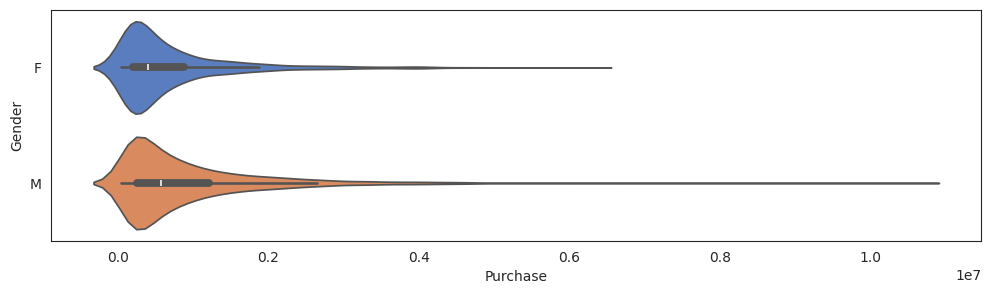

In [ ]:
# @title Gender vs Purchase Amount(in Millions)

figsize = (12, 1.5 * len(amount_spent['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(amount_spent, x='Purchase', y='Gender', inner='box', palette='muted')
plt.show()

In [ ]:

df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
avg_male = df_male['Purchase'].mean()
avg_female = df_female['Purchase'].mean()
print("Average amount spent by Male customers: {:.2f}".format(avg_male))
print("Average amount spent by Female customers: {:.2f}".format(avg_female))

# @title Male customers spend more money than female customers

Average amount spent by Male customers: 9437.53
Average amount spent by Female customers: 8734.57


2.**Confidence intervals and distribution of the mean of the expenses by female and male customers**

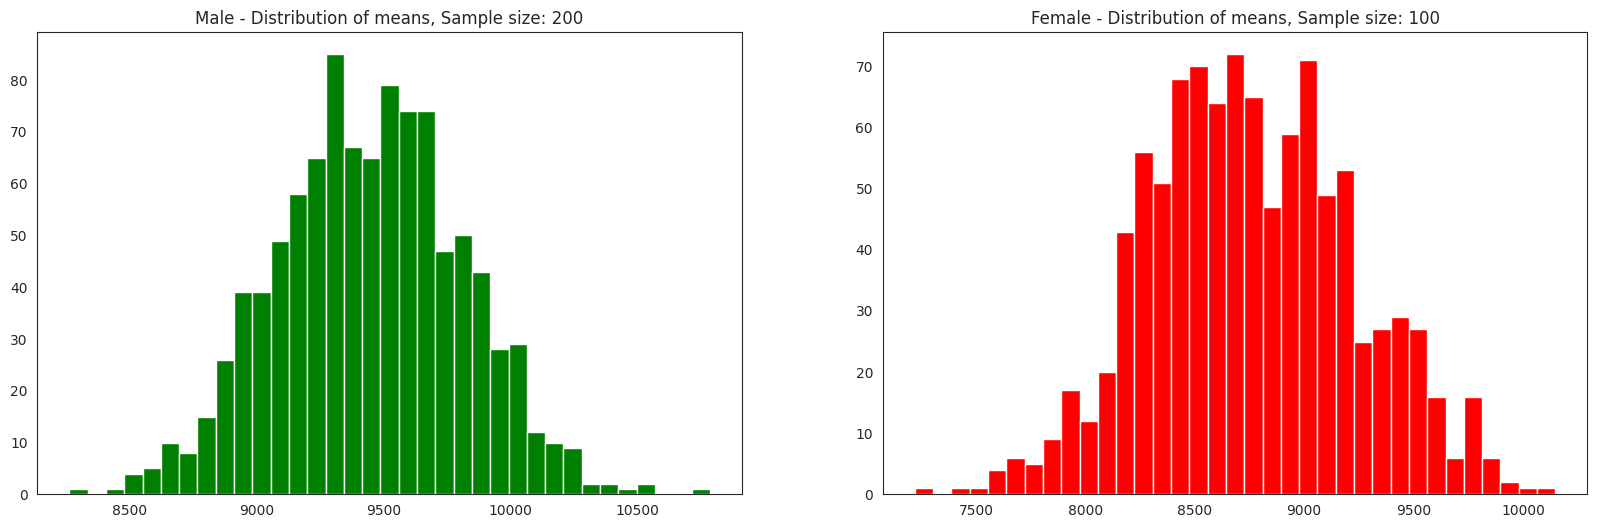

In [ ]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
avg_male = df_male['Purchase'].mean()
avg_female = df_female['Purchase'].mean()

genders = ["M", "F"]
number_of_repititions = 1000

male_means = []
female_means = []

def female_data_sample():
  female_mean = np.array(df_female['Purchase'].values)
  samples = random.sample(range(0, female_mean.shape[0]),100)
  return female_mean[samples].mean()

def male_data_sample():
  male_mean = np.array(df_male['Purchase'].values)
  samples = random.sample(range(0, male_mean.shape[0]),200)
  return male_mean[samples].mean()

for i in range(number_of_repititions):
  female_means.append(female_data_sample())
  male_means.append(male_data_sample())

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35,color="Green")
axis[1].hist(female_means, bins=35,color="Red")
axis[0].set_title("Male - Distribution of means, Sample size: 200")
axis[1].set_title("Female - Distribution of means, Sample size: 100")
plt.show()


In [ ]:
print("Population mean - Mean of sample means of amount spent for Male: {:.4f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spent for Female: {:.4f}".format(np.mean(female_means)))
print("\nMale - Sample mean: {:.4f} Sample std: {:.4f}".format(df_male['Purchase'].mean(), df_male['Purchase'].std()))
print("Female - Sample mean: {:.4f} Sample std: {:.4f}".format(df_female['Purchase'].mean(),df_female['Purchase'].std()))

Population mean - Mean of sample means of amount spent for Male: 9444.7832
Population mean - Mean of sample means of amount spent for Female: 8753.9816

Male - Sample mean: 9437.5260 Sample std: 5092.1862
Female - Sample mean: 8734.5658 Sample std: 4767.2333


Now From  Central Limit Theorem for the population we can say that:
1. Average amount spend by male customers is 9437.52
2. Average amount spend by female customers is 8734.56

3.**Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
male_margin_of_error_clt = 1.96*df_male['Purchase'].std()/np.sqrt(len(df_male))
male_sample_mean = df_male['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt = 1.96*df_female['Purchase'].std()/np.sqrt(len(df_female))
female_sample_mean = df_female['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9422.02, 9453.03)
Female confidence interval of means: (8709.21, 8759.92)


We can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (9422.02, 9453.03)
2. Average amount spend by female customer will lie in between: (8709.21, 8759.92)


The CI's of Males and Females are not overlapping.

4.**Results when the same activity is performed for Married vs Unmarried**

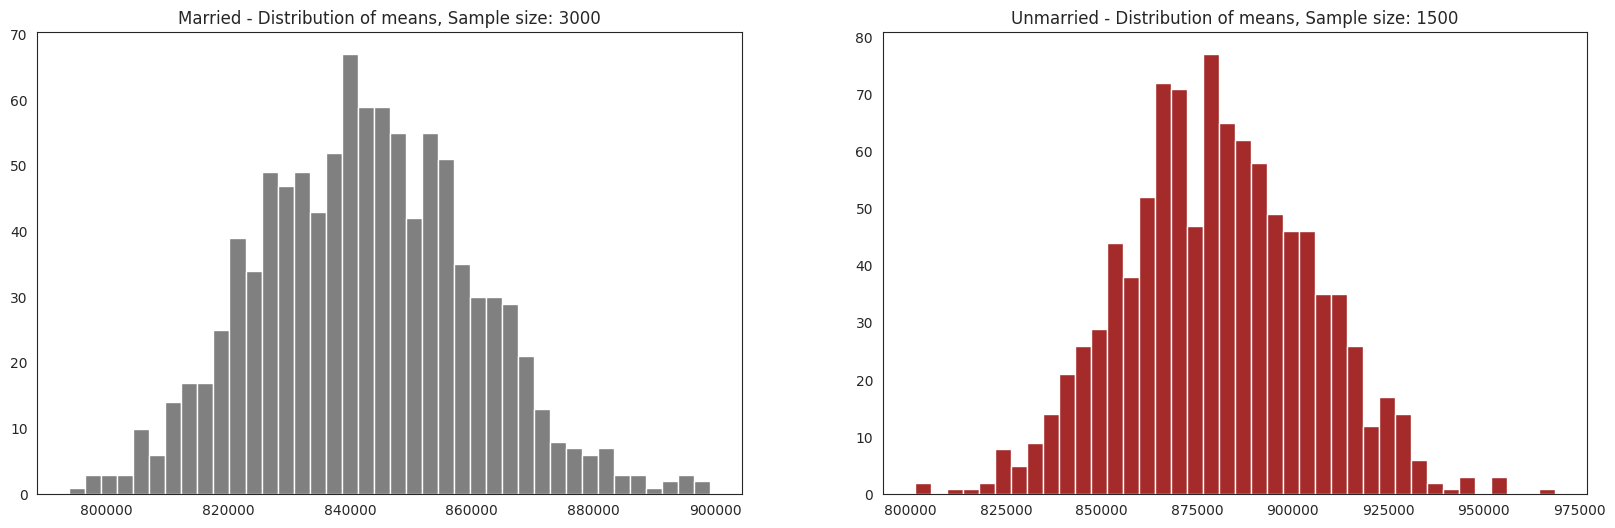

Population mean - Mean of sample means of amount spend for Married: 842471.39
Population mean - Mean of sample means of amount spend for Unmarried: 880282.66

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25
Married Confidence Interval of means: (806668.83, 880384.76)
Unmarried Confidence Interval of means: (848741.18, 912410.38)


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 1500
num_repitions = 1000
marid_means = []
unmarid_means = []
for _ in range(num_repitions):
 marid_mean =amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size,replace=True)['Purchase'].mean()
 unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size,replace=True)['Purchase'].mean()
 marid_means.append(marid_mean)
 unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(marid_means, bins=40,color="Grey")
axis[1].hist(unmarid_means,bins=40,color="Brown")
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 1500")
plt.show()
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))
print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))
for val in ["Married", "Unmarried"]:

 new_val = 1 if val == "Married" else 0

 new_df = amt_df[amt_df['Marital_Status']==new_val]

 margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
 sample_mean = new_df['Purchase'].mean()
 lower_lim = sample_mean - margin_of_error_clt
 upper_lim = sample_mean + margin_of_error_clt

 print("{} Confidence Interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


5.**Results when the same activity is performed for Age**

Calculating the average amount spent by **age**

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000
all_means = {}
age_intervals = ['0-17','18-25','26-35', '36-45', '46-50', '51-55', '55+']
for age_interval in age_intervals:
 all_means[age_interval] = []
for age_interval in age_intervals:
 for _ in range(num_repitions):
  mean = amt_df[amt_df['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
  all_means[age_interval].append(mean)

for val in ['0-17','18-25','26-35', '36-45', '46-50', '51-55', '55+']:
  new_df = amt_df[amt_df['Age']==val]
  margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt
  print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


For age 0-17 --> confidence interval of means: (527662.46, 710073.17)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)


## **Insights**:

1. The majority of users are male.
2. There are twenty distinct types of occupation and product categories.
3. B City_Category has a larger user base compared to other city categories.
4. Single users outnumber married users.
5. Product categories 1, 5, 8, and 11 exhibit the highest purchasing frequency.
6. When comparing purchase behavior with occupation, occupations 1, 2, 6, 9, 13, and 20 demonstrate more outliers compared to other occupations, although the median purchase amount remains consistent across all occupations.
7. In terms of purchase behavior across different city categories, while A and B city categories exhibit some outliers, the median purchase amount remains relatively consistent across all categories.
8. Purchase behavior across product categories shows significant variation in median purchase amounts. Outliers are particularly noticeable in product categories 1, 2, 5, 9, 10, 14, and 16. Using the Interquartile Range (IQR) method, a total of 2677 outliers were identified.

# **Recommendations**



1.   Men spent more money than women.So the company has to focus on attracting more women customerseither by marketing campaign's or by increasing specific product category .
2.   Unmarried customers spend more money than married customers, So company can focus on acquisition of Unmarried customers.
3. From the CI of means we can see that the range of amount spent by the customers in the age  of 18-45 is higher compared to other ages.So the company has to focus on acquisition of customers in this age range.
4. Since the product categories 1,5,8,11 have more buyers , the company can can improvise the stocks of these products.Since they are high selling.
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
6. As more users belong to City_Category B, The company allocate more resources towards this market segment, such as opening new stores or offering location-specific promotions to capitalize on the higher user base.
7. Investigate the reasons behind the outliers in city categories A and B while maintaining consistent median purchase amounts. This could involve understanding local market dynamics, consumer behavior, and competition to optimize business strategies in these regions.
8. Analyze the variations in median purchase amounts across product categories to identify potential opportunities for improvement. This could involve optimizing pricing strategies and  enhancing product features.
